PREPROCESAMIENTO DE DATOS

In [ ]:
import pandas as pd
import numpy as np
import collections as cols
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Cargar el archivo CSV
file_path = 'databases/Base de datos para desarrollo v2.csv'
df = pd.read_csv(file_path)
print(df)
print(df.columns)

<ipython-input-1-a77b2446fa6b>:8: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


        var001       var002              var005 _temperatura_cat   _pulso_cat  \
0            1  U0003670130  01jan2021 00:27:00           Normal       Normal   
1            2  U0003670132  01jan2021 00:29:00           Normal       Normal   
2            3  U0003670154  01jan2021 01:21:00           Normal       Normal   
3            4  U0003670170  01jan2021 02:02:00           Fiebre  Taquicardia   
4            5  U0003670177  01jan2021 02:31:00           Normal       Normal   
...        ...          ...                 ...              ...          ...   
116565  238743  U0005201899  31dec2023 21:04:59           Normal       Normal   
116566  238745  U0005201918  31dec2023 21:45:00           Normal       Normal   
116567  238746  U0005201934  31dec2023 22:12:59           Normal       Normal   
116568  238747  U0005201936  31dec2023 22:17:00           Normal       Normal   
116569  238749  U0005201969  31dec2023 23:28:00           Normal       Normal   

               _pas_cat    

In [ ]:
# Paso 1: Eliminar las columnas no útiles y vacíos

df_cleaned = df[['__temperatura','__pulso','__pas','__pad','__sat02','__destino']].copy()
print(df_cleaned)

# Eliminar filas con valores NaN en cualquier columna

# Verificar la cantidad de filas totales
print(f"Número de filas antes de eliminar NaN: {len(df_cleaned)}")
#df_cleaned = df_cleaned.dropna()
# Eliminar las filas donde '__destino' y '__categ_fin' es NaN
df_cleaned = df_cleaned.dropna(subset=['__destino'])
# Rellenar los datos NaN por 0
df_cleaned = df_cleaned.fillna(0)
# Verificar que los valores NaN fueron reemplazados
print(df_cleaned.isnull().sum())

# Verificar la cantidad de filas restantes
print(f"Número de filas después de eliminar NaN: {len(df_cleaned)}")
print(df_cleaned)

        __temperatura __pulso __pas  __pad __sat02  __destino
0           35.799999      85   174   87.0      98  Domicilio
1           36.500000      87   118   82.0      99  Domicilio
2           35.700001      93   159   99.0     100  Domicilio
3           38.799999     159   NaN    NaN     100  Domicilio
4           36.299999      83   NaN    NaN      96  Domicilio
...               ...     ...   ...    ...     ...        ...
116565            NaN      89   119   63.0      99  Domicilio
116566            NaN     100   127   68.0      99  Domicilio
116567            NaN      72   135   73.0      98  Domicilio
116568            NaN      80   139   68.0      99  Domicilio
116569            NaN      85   154   92.0      99  Domicilio

[116570 rows x 6 columns]
Número de filas antes de eliminar NaN: 116570
__temperatura    0
__pulso          0
__pas            0
__pad            0
__sat02          0
__destino        0
dtype: int64
Número de filas después de eliminar NaN: 101579
        

In [ ]:
# Paso 2: 

# Convertir las columnas que se encuentran como objeto a numéricas
# Columnas a convertir
columns_to_convert = ['__pas', '__pulso', '__sat02']

# Convertir las columnas a float64
for column in columns_to_convert:
    df_cleaned[column] = pd.to_numeric(df_cleaned[column], errors='coerce').astype('float64')


# Convertir las columnas categóricas a valores numéricos usando Label Encoding
print(df_cleaned['__destino'].unique())

# Crear una copia del DataFrame para almacenar los mapeos
category_mappings = {}

label_encoders = {}
for column in ['__destino']:
    le = LabelEncoder()
    df_cleaned[column] = le.fit_transform(df_cleaned[column].astype(str)) + 1
    label_encoders[column] = le
    
    category_mappings[column] = pd.DataFrame({
        'Categórico': le.classes_,
        'Numérico': range(1, len(le.classes_) + 1)
    })

print(df_cleaned)

print("Mapeo para '__destino':")
print(category_mappings['__destino'])




['Domicilio' 'Hospitalización domiciliaria' 'Derivación'
 'Carabineros o PDI' 'Hospitalización' 'Otros']
        __temperatura  __pulso  __pas  __pad  __sat02  __destino
0           35.799999     85.0  174.0   87.0     98.0          3
1           36.500000     87.0  118.0   82.0     99.0          3
2           35.700001     93.0  159.0   99.0    100.0          3
3           38.799999    159.0    0.0    0.0    100.0          3
4           36.299999     83.0    0.0    0.0     96.0          3
...               ...      ...    ...    ...      ...        ...
116565       0.000000     89.0  119.0   63.0     99.0          3
116566       0.000000    100.0  127.0   68.0     99.0          3
116567       0.000000     72.0  135.0   73.0     98.0          3
116568       0.000000     80.0  139.0   68.0     99.0          3
116569       0.000000     85.0  154.0   92.0     99.0          3

[101579 rows x 6 columns]
Mapeo para '__destino':
                     Categórico  Numérico
0             Carabine

Counter({3: 94541, 2: 4081, 4: 2249, 5: 505, 1: 170, 6: 33})
[3, 5, 2, 1, 4, 6]
[94541, 505, 4081, 170, 2249, 33]


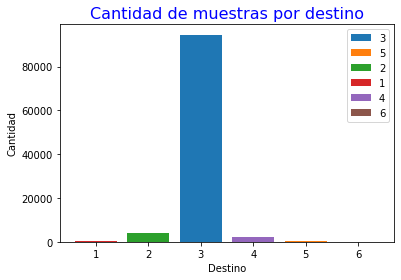

In [ ]:
import matplotlib.pyplot as plt
from pylab import rcParams

count_cat = cols.Counter(df_cleaned["__destino"])
print(count_cat)

#Obtenemos los elementos por cada genero y su cantidad de muestras
category = list(count_cat.keys())
print(category)
cat_size = list(count_cat.values())
print(cat_size)


#Fuente
font = {'family': 'sans-serif',
        'color':  'blue',
        'weight': 'normal',
        'size': 16,
        }

plt.title("Cantidad de muestras por destino", fontdict=font)
plt.xlabel("Destino")
plt.ylabel("Cantidad")

for i in range(len(cat_size)):
  plt.bar(category[i], cat_size[i], label=category[i])

plt.legend()
plt.show()


In [ ]:
# ordenar la base de datos en referencia a destino
print("Datos ordenada por Destino")
sorted_df_dest = df_cleaned.sort_values('__destino')
print(sorted_df_dest)

Datos ordenada por Destino
        __temperatura  __pulso  __pas  __pad  __sat02  __destino
34031       36.500000    121.0  198.0  112.0     98.0          1
41664       36.500000     94.0    0.0    0.0     99.0          1
99296       36.400002     74.0  147.0   81.0     99.0          1
1450        36.500000    120.0  173.0  103.0    100.0          1
79296       35.500000     87.0  114.0   83.0     98.0          1
...               ...      ...    ...    ...      ...        ...
32773       36.400002     84.0    0.0    0.0     99.0          6
105104      36.000000     80.0  117.0   81.0    100.0          6
9298        36.299999    162.0   93.0   65.0     96.0          6
33265       36.200001     95.0  119.0   73.0     97.0          6
32435       36.400002    145.0    0.0    0.0    100.0          6

[101579 rows x 6 columns]


In [ ]:
# Separamos el conjunto de datos Destino
categoria_counts_dest = sorted_df_dest['__destino'].value_counts().sort_index()

# Mostrar los resultados
print(categoria_counts_dest)

# Crear un DataFrame con el inicio y fin de cada categoría
# Resetear el índice si es necesario
sorted_df_dest = sorted_df_dest.reset_index(drop=True)
category_ranges_dest = sorted_df_dest.groupby('__destino').apply(
    lambda group: pd.Series({
        'Inicio': group.index.min(),
        'Fin': group.index.max()
    })
).reset_index()

# Mostrar los resultados
category_ranges_dest.columns = ['Destino', 'Inicio', 'Fin']
print(category_ranges_dest)


__destino
1      170
2     4081
3    94541
4     2249
5      505
6       33
Name: count, dtype: int64
   Destino  Inicio     Fin
0        1       0     169
1        2     170    4250
2        3    4251   98791
3        4   98792  101040
4        5  101041  101545
5        6  101546  101578


In [ ]:
# 1: 152 | 2: 3389 | 3: 70781 | 4: 2001 | 5: 471 | 6: 18
first_group_dest = sorted_df_dest[sorted_df_dest['__destino'].isin([1, 2, 4, 5, 6])]
second_group_dest = sorted_df_dest[sorted_df_dest['__destino'] == 3]

print("--- FIRST GROUP ---")
print(first_group_dest)
print("--- SECOND GROUP ---")
print(second_group_dest)


--- FIRST GROUP ---
        __temperatura  __pulso  __pas  __pad  __sat02  __destino
0           36.500000    121.0  198.0  112.0     98.0          1
1           36.500000     94.0    0.0    0.0     99.0          1
2           36.400002     74.0  147.0   81.0     99.0          1
3           36.500000    120.0  173.0  103.0    100.0          1
4           35.500000     87.0  114.0   83.0     98.0          1
...               ...      ...    ...    ...      ...        ...
101574      36.400002     84.0    0.0    0.0     99.0          6
101575      36.000000     80.0  117.0   81.0    100.0          6
101576      36.299999    162.0   93.0   65.0     96.0          6
101577      36.200001     95.0  119.0   73.0     97.0          6
101578      36.400002    145.0    0.0    0.0    100.0          6

[7038 rows x 6 columns]
--- SECOND GROUP ---
       __temperatura  __pulso  __pas  __pad  __sat02  __destino
4251       38.799999    139.0  114.0   82.0     98.0          3
4252       38.599998    14

In [ ]:
print(first_group_dest)
first_group_dest_tmp = first_group_dest
first_group_dest_tmp['__destino'] = 0
print(first_group_dest_tmp)
print(second_group_dest)
second_group_dest_tmp = second_group_dest
second_group_dest_tmp['__destino'] = 1
print(second_group_dest_tmp)
nuevo_grupo_dest = pd.concat([first_group_dest_tmp, second_group_dest_tmp], ignore_index=True)
print(nuevo_grupo_dest)

        __temperatura  __pulso  __pas  __pad  __sat02  __destino
0           36.500000    121.0  198.0  112.0     98.0          1
1           36.500000     94.0    0.0    0.0     99.0          1
2           36.400002     74.0  147.0   81.0     99.0          1
3           36.500000    120.0  173.0  103.0    100.0          1
4           35.500000     87.0  114.0   83.0     98.0          1
...               ...      ...    ...    ...      ...        ...
101574      36.400002     84.0    0.0    0.0     99.0          6
101575      36.000000     80.0  117.0   81.0    100.0          6
101576      36.299999    162.0   93.0   65.0     96.0          6
101577      36.200001     95.0  119.0   73.0     97.0          6
101578      36.400002    145.0    0.0    0.0    100.0          6

[7038 rows x 6 columns]
        __temperatura  __pulso  __pas  __pad  __sat02  __destino
0           36.500000    121.0  198.0  112.0     98.0          0
1           36.500000     94.0    0.0    0.0     99.0          0


<ipython-input-8-3613df0075ba>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_group_dest_tmp['__destino'] = 0
<ipython-input-8-3613df0075ba>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_group_dest_tmp['__destino'] = 1


In [ ]:
from imblearn.combine import SMOTEENN
from sklearn.utils import resample

# Balanceo de datos con SMOTE
x = nuevo_grupo_dest[['__temperatura', '__pulso', '__pas', '__pad', '__sat02']]
y = nuevo_grupo_dest['__destino']
'''
# Aplicar SMOTE solo al conjunto de entrenamiento
smote_enn = SMOTEENN(random_state=42)
x_balanced, y_balanced = smote_enn.fit_resample(x, y)

print(x_balanced)

# Verificar los nuevos tamaños de las clases
print("Distribución después de SMOTE:")
print(y_balanced.value_counts())

nuevo_grupo_dest = pd.concat([x_balanced, y_balanced], axis=1)
'''
# Sobremuestrear la clase minoritaria
class_0_upsampled = resample(first_group_dest,
                             replace=True,      # Permitir duplicados
                             n_samples=len(second_group_dest),  # Igualar a la clase mayoritaria
                             random_state=42)

# Combinar las clases
nuevo_grupo_dest = pd.concat([class_0_upsampled, second_group_dest])
nuevo_grupo_dest = nuevo_grupo_dest.sort_values('__destino')
print(nuevo_grupo_dest)

        __temperatura  __pulso  __pas  __pad  __sat02  __destino
860         36.500000     88.0  107.0   49.0     98.0          0
100958       0.000000      0.0    0.0    0.0      0.0          0
1877         0.000000     61.0  133.0   81.0     99.0          0
99892       36.500000    139.0  184.0  100.0    100.0          0
101519      36.299999    116.0   84.0   71.0     99.0          0
...               ...      ...    ...    ...      ...        ...
35759       35.599998     94.0  102.0   49.0    100.0          1
35758       35.299999    105.0  102.0   49.0     96.0          1
35757       35.400002     74.0  146.0   91.0     98.0          1
35766       36.000000     79.0  135.0   78.0     99.0          1
98791       36.500000     65.0  119.0   55.0    100.0          1

[189082 rows x 6 columns]


In [ ]:
# Seleccionar solo las columnas de interés
features = ['__temperatura', '__pulso', '__pas', '__pad', '__sat02']
target = '__destino'

# Calcular la correlación de las características con '__destino'
correlations = nuevo_grupo_dest[features + [target]].corr()

# Mostrar la correlación de cada característica con '__destino'
print(correlations[target].sort_values(ascending=False))

__destino        1.000000
__temperatura    0.096893
__sat02          0.072691
__pulso          0.038397
__pad           -0.168678
__pas           -0.185651
Name: __destino, dtype: float64


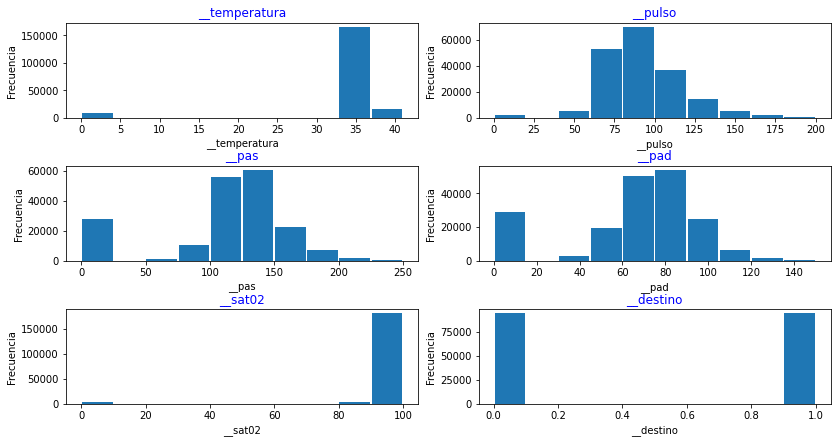

In [ ]:
# Histogramas Categoria Nuevo
# First Group
font2 = {'family': 'sans-serif',
        'color':  'blue',
        'weight': 'normal',
        'size': 14,
        }

pos = 1
for col_name in nuevo_grupo_dest.columns[0:6]:
  plt.subplot(4, 2, pos)
  plt.hist(nuevo_grupo_dest[col_name], bins=10, rwidth=0.95)
  plt.title('Histograma de' + col_name, fontdict=font2)
  plt.xlabel(col_name)
  plt.ylabel('Frecuencia')
  plt.title(col_name)

  pos = pos + 1

plt.tight_layout(pad=1.8, w_pad=0.5, h_pad=0, rect=(0,0,2,2))

plt.show()

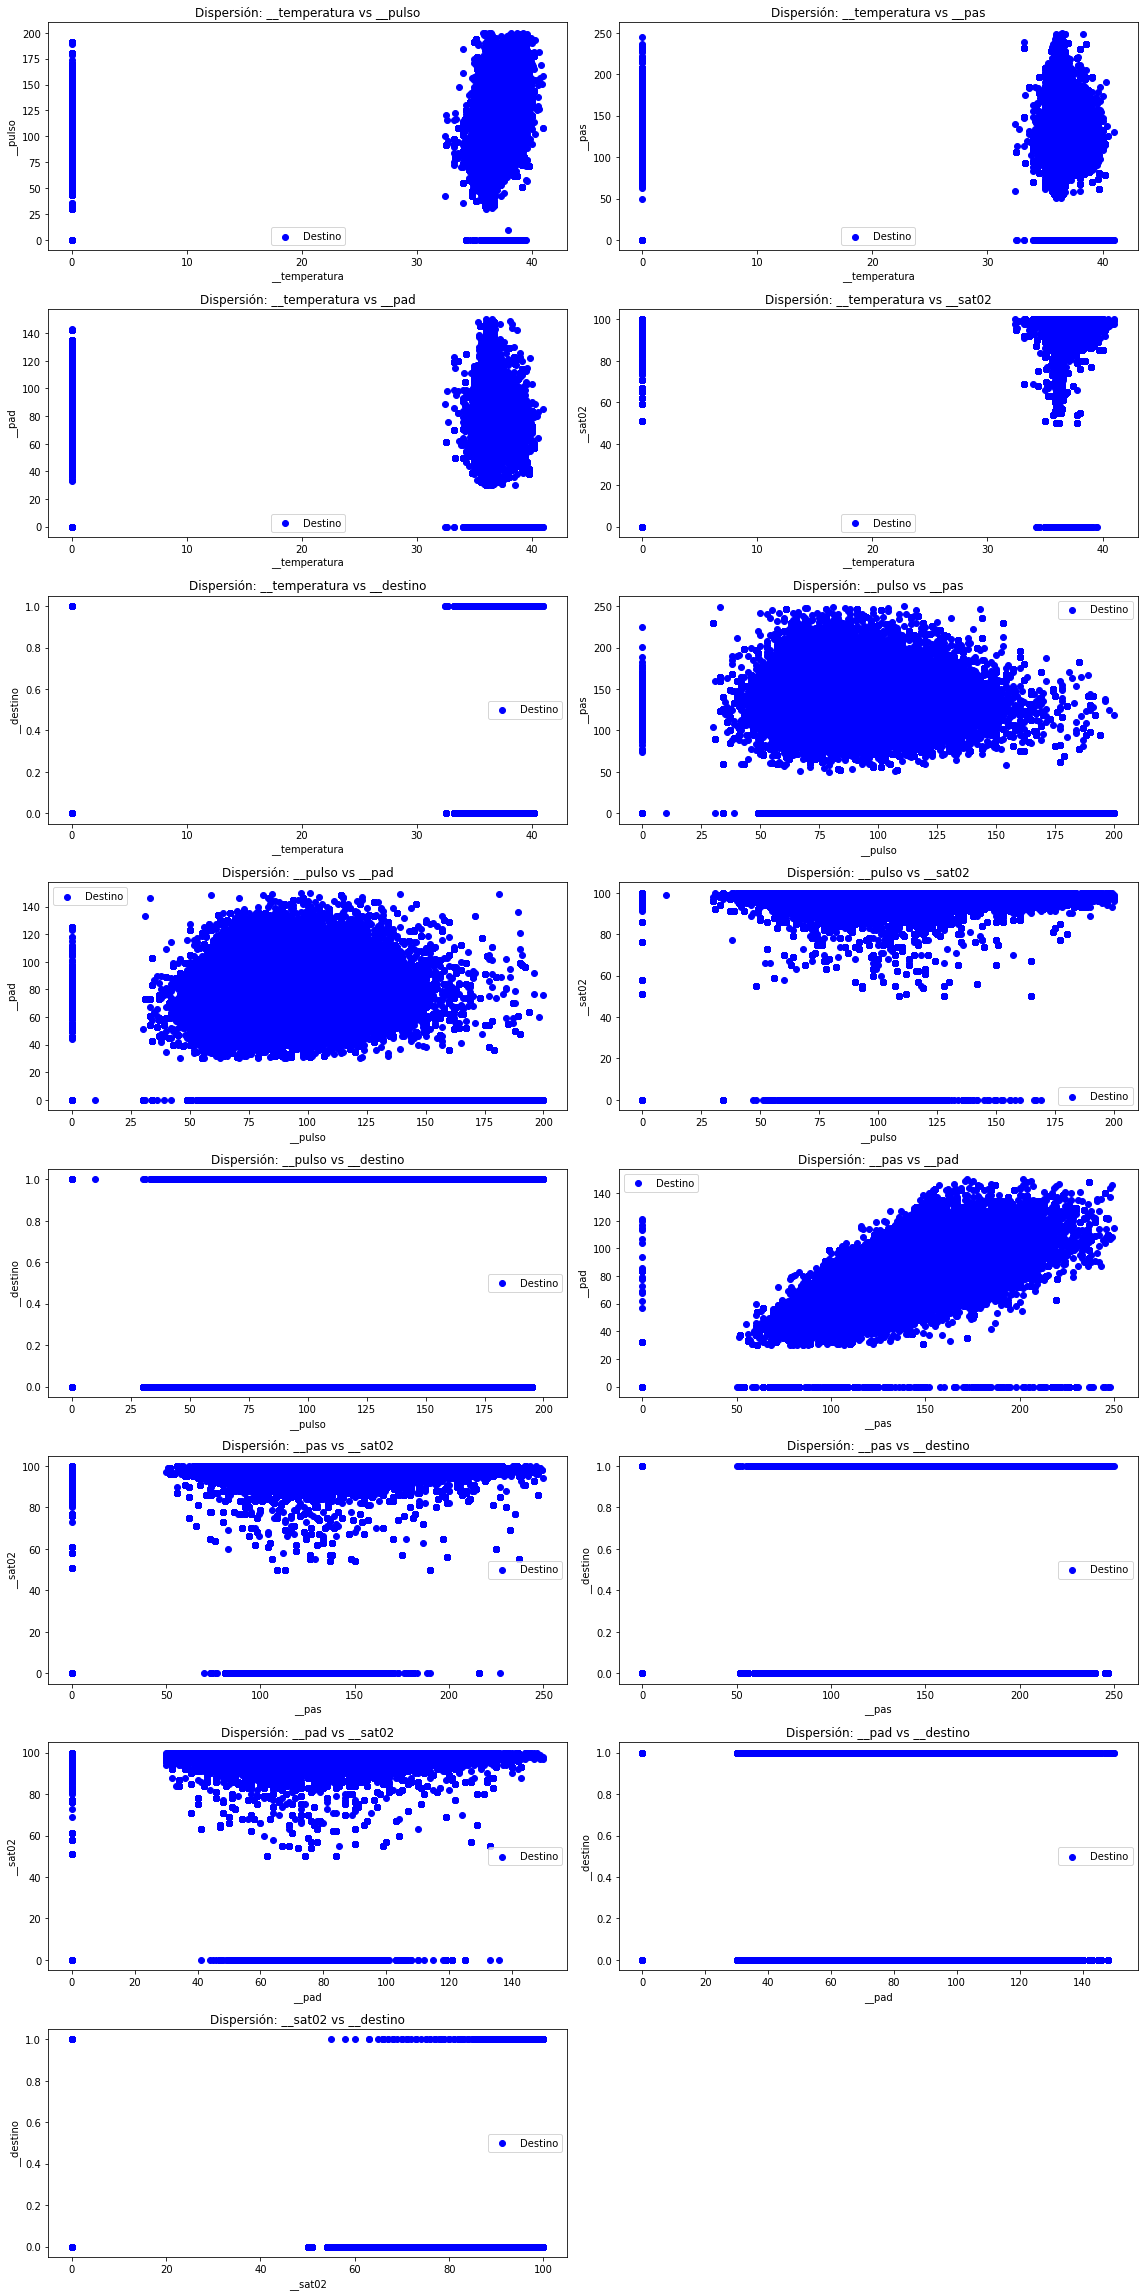

In [ ]:
# Diagrama de dispersión para Destino
from itertools import combinations

# Columnas seleccionadas para los diagramas
columns = ['__temperatura', '__pulso', '__pas', '__pad', '__sat02', '__destino']


# Generar combinaciones de pares de columnas
pairs = list(combinations(columns, 2))

# Determinar el número de filas y columnas en la cuadrícula
n_cols = 2
n_rows = (len(pairs) + n_cols - 1) // n_cols  # Redondear hacia arriba


#First Group

# Crear la cuadrícula de subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 4))
axs = axs.flatten()  # Asegurar acceso como una lista lineal

# Crear diagramas de dispersión para cada par de columnas
for idx, (col_x, col_y) in enumerate(pairs):
    ax = axs[idx]
    ax.scatter(nuevo_grupo_dest[col_x], nuevo_grupo_dest[col_y], marker='o', color='blue', label='Destino')
    ax.set_title(f"Dispersión: {col_x} vs {col_y}")
    ax.set_xlabel(col_x)
    ax.set_ylabel(col_y)
    ax.legend()

# Eliminar los subplots vacíos si hay más espacios que pares de columnas
for idx in range(len(pairs), len(axs)):
    fig.delaxes(axs[idx])

# Ajustar espacio entre subplots
fig.tight_layout()
plt.show()

In [ ]:
# Extrae la columna de Destino
df_output_1_dest = nuevo_grupo_dest['__destino'].copy()
df_cleaned_1_dest = nuevo_grupo_dest.drop(['__destino'],axis=1)

print(df_output_1_dest)
print(df_cleaned_1_dest)

860       0
100958    0
1877      0
99892     0
101519    0
         ..
35759     1
35758     1
35757     1
35766     1
98791     1
Name: __destino, Length: 189082, dtype: int64
        __temperatura  __pulso  __pas  __pad  __sat02
860         36.500000     88.0  107.0   49.0     98.0
100958       0.000000      0.0    0.0    0.0      0.0
1877         0.000000     61.0  133.0   81.0     99.0
99892       36.500000    139.0  184.0  100.0    100.0
101519      36.299999    116.0   84.0   71.0     99.0
...               ...      ...    ...    ...      ...
35759       35.599998     94.0  102.0   49.0    100.0
35758       35.299999    105.0  102.0   49.0     96.0
35757       35.400002     74.0  146.0   91.0     98.0
35766       36.000000     79.0  135.0   78.0     99.0
98791       36.500000     65.0  119.0   55.0    100.0

[189082 rows x 5 columns]


In [ ]:
# Paso 4: Escalar los datos para que tengan una media de 0 y una desviación estándar de 1
scaler = StandardScaler()
#numeric_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
colums_to_scale = nuevo_grupo_dest[['__temperatura','__pulso','__pas','__pad','__sat02']].columns
#df_cleaned[numeric_columns] = scaler.fit_transform(df_cleaned[numeric_columns])

nuevo_grupo_dest_fit = nuevo_grupo_dest
nuevo_grupo_dest_fit[colums_to_scale] = scaler.fit_transform(nuevo_grupo_dest[colums_to_scale])

print(nuevo_grupo_dest_fit)

        __temperatura   __pulso     __pas     __pad   __sat02  __destino
860          0.229959 -0.141229 -0.090837 -0.514129  0.166636          0
100958      -4.667926 -3.667914 -2.134067 -2.059868 -6.671051          0
1877        -4.667926 -1.223280  0.405649  0.495334  0.236409          0
99892        0.229959  1.902645  1.379525  1.094702  0.306181          0
101519       0.203121  0.980898 -0.530036  0.179877  0.236409          0
...               ...       ...       ...       ...       ...        ...
35759        0.109189  0.099227 -0.186315 -0.514129  0.306181          1
35758        0.068933  0.540062 -0.186315 -0.514129  0.027092          1
35757        0.082352 -0.702292  0.653892  0.810791  0.166636          1
35766        0.162865 -0.501913  0.443840  0.400697  0.236409          1
98791        0.229959 -1.062976  0.138310 -0.324855  0.306181          1

[189082 rows x 6 columns]


In [ ]:
# Exportar el DataFrame resultante a un archivo CSV
nuevo_grupo_dest_fit['__destino'] = df_output_1_dest
output_file_path = 'databases/Base de datos para desarrollo v2_dest(preprocesada).csv'
nuevo_grupo_dest_fit.to_csv(output_file_path, index=False)

print(f"El archivo preprocesado se ha guardado en {output_file_path}")

El archivo preprocesado se ha guardado en databases/Base de datos para desarrollo v2_dest(preprocesada).csv


In [ ]:
from joblib import dump

# Guardar el escalador
dump(scaler, 'modelo/escalador.pkl')

['escalador.pkl']